In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

loading image

In [2]:
def read_file(filename):
  img = cv2.imread(filename)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.show()
  return img

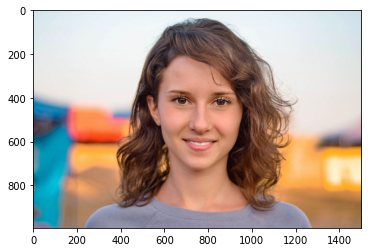

In [3]:
filename = "image2.jpg"
img = read_file(filename)
org_img = np.copy(img)

creating edge mask

In [4]:
def edge_mask(img, line_size, blur_value):
  # gray scale img to edges of img
  gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
  gray_blur = cv2.medianBlur(gray, blur_value)
  
  edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
  return edges

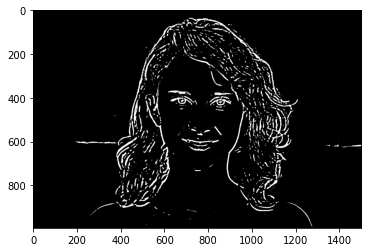

In [5]:
line_size, blur_value = 13,7
edges = edge_mask(img, line_size, blur_value)
plt.imshow(edges, cmap = "binary")
plt.show()

In [6]:

 # reducing color palette
def color_quantization(img, k):

  # transform the img
  data = np.float32(img).reshape((-1,3))

  #determine criteria
  criteria = (cv2.TERM_CRITERIA_EPS+ cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

  #implementing k-means
  ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  center = np.uint8(center)

  result = center[label.flatten()]
  result = result.reshape(img.shape)

  return result

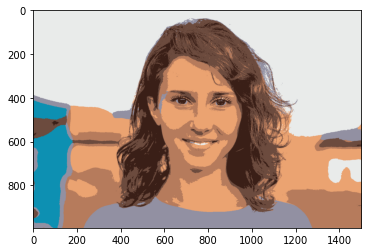

In [7]:
img = color_quantization(img, k = 7)

plt.imshow(img)
plt.show()

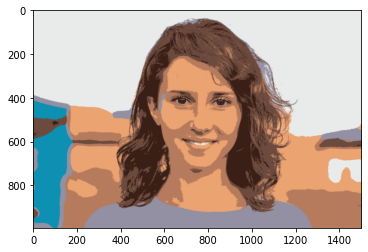

In [8]:
# reduce the noise
blurred = cv2.bilateralFilter(img, d = 3, sigmaColor = 300, sigmaSpace = 300)
plt.imshow(blurred)
plt.show()

combine edge mask with the quantized image

In [9]:
def cartoon():
  c = cv2.bitwise_and(blurred, blurred, mask = edges)

  plt.imshow(c)
  plt.show()

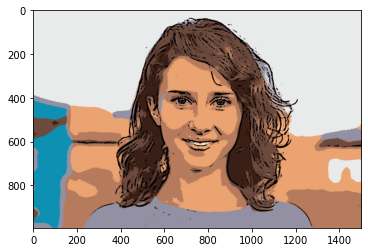

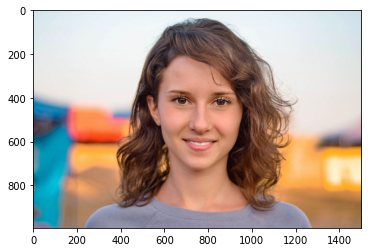

In [10]:
cartoon()
plt.imshow(org_img)
plt.show()